# Part IV: Validation and Testing

Authors: Jordi Bolibar & Facundo Sapienza

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 4.1 Cross-validation and testing

The goal of this notebook is to explore different validation and testing methodologies that you can use and the respective considerations you have to consider at the moment of assessing the performance of a given model, either for model selection or test report. 

When training and testing a model, we usually split the dataset among three different sets: training, validation and testing set. Sometimes, this split of the data is done automatically by the method we use, and sometimes instead of a simple split of the dataset into K folds is done iteratively (eg, in k-fold cross-validation). Independently of how we implement this, we need to understand the limitations and considerations we need to have at the moment we do the split. This considerations can include:

- Sampling procedure
- Spatial and temporal correlations between data points
- Size of data available
- Nature of the datasets: where are they coming from? How independent are they?

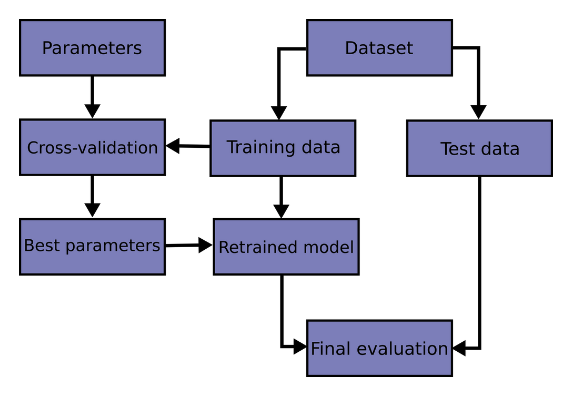

*Figure 1: Cross-validation workflow.*

### [ **Exercice 3** ]
<img src="Figures/eye_logo.png" width="75"/>

How would you design a validation-testing workflow for the problem of predicting the mass balance? How would you divide the different folds?

For an excellent introduction to cross-validation, as well as the different high-level function to implement it in `sklearn` models, checkout [this tutorial](https://scikit-learn.org/stable/modules/cross_validation.html). 

This notebook is up to you to define it. Choose a cross-validation approach, and use it in one of the machine learning models you chose from the previous notebook. Try to tune the hyperparameters as much as you can in cross-validation. In the end, once you are sure you cannot improve performance anymore, load the **test** dataset that we saved in the previous notebook, and assess the final model performance with your selected hyperparameters.

### Happy coding! 

## 4.2 Hyperparameter selection in cross-validation for a chosen model

In [18]:
>>> import numpy as np
>>> from sklearn.model_selection import train_test_split
>>> from sklearn import datasets
>>> from sklearn import svm

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn import ensemble
from sklearn.inspection import permutation_importance

from sklearn.model_selection import GridSearchCV

In [5]:
df_all = pd.read_csv('Data/df_all.csv', index_col=['rgi_id', 'period'])
df_all

PDD    area  icecap     lat     prcp_01   
rgi_id         period                                                     
RGI60-08.00001 2000-2010  39.787001   0.030     0.0  67.930   59.556398  \
               2010-2020  41.833601   0.030     0.0  67.930   57.685775   
RGI60-08.00002 2000-2010  44.907200   0.030     0.0  67.870   62.082497   
               2010-2020  46.980223   0.030     0.0  67.870   59.345685   
RGI60-08.00003 2000-2010  35.337201   0.020     0.0  67.820   60.485810   
...                             ...     ...     ...     ...         ...   
RGI60-08.03415 2010-2020  34.757735   0.056     0.0  66.729  131.108065   
RGI60-08.03416 2000-2010  66.325377  14.152     0.0  66.006  160.244277   
               2010-2020  66.505066  14.152     0.0  66.006  174.868147   
RGI60-08.03417 2000-2010  53.358777   0.150     0.0  65.923  152.880332   
               2010-2020  53.116888   0.150     0.0  65.923  165.529468   

                             prcp_02     prcp_03     prcp_04     prcp_05   
rgi_id         period                                                      
RGI60-08.00001 2000-2010   42.393607   49.464068   40.707838   28.460900  \
               2010-2020   45.119089   49.848962   37.706105   33.120270   
RGI60-08.00002 2000-2010   43.677873   49.432192   41.313322   28.519503   
               2010-2020   45.845166   49.957571   37.644466   32.577409   
RGI60-08.00003 2000-2010   45.600863   55.059464   46.842254   33.796713   
...                              ...         ...         ...         ...   
RGI60-08.03415 2010-2020  107.707591  144.610990   98.574383   92.859806   
RGI60-08.03416 2000-2010  183.438569  186.103358  190.792902  139.485696   
               2010-2020  146.277851  205.123464  136.355639  129.459209   
RGI60-08.03417 2000-2010  173.554018  177.555157  183.980329  133.112843   
               2010-2020  138.168895  196.729779  132.081722  123.916238   

                             prcp_06  ...   temp_09    temp_10    temp_11   
rgi_id         period                 ...                                   
RGI60-08.00001 2000-2010   32.946557  ...  8.765555  13.037779  10.950000  \
               2010-2020   41.740137  ...  8.942221  13.034446  11.120000   
RGI60-08.00002 2000-2010   32.153049  ...  9.274814  13.517038  11.384073   
               2010-2020   40.674079  ...  9.423703  13.538149  11.500740   
RGI60-08.00003 2000-2010   38.831589  ...  7.059999  11.433335   9.346666   
...                              ...  ...       ...        ...        ...   
RGI60-08.03415 2010-2020  111.586080  ...  4.860000   8.513335   7.726667   
RGI60-08.03416 2000-2010  115.362394  ...  6.778889   9.997777   9.253333   
               2010-2020  140.041785  ...  6.448889   9.764443   9.126666   
RGI60-08.03417 2000-2010  112.064028  ...  7.277778  10.505554   9.549999   
               2010-2020  134.381284  ...  6.947778  10.288887   9.436666   

                           temp_12    zmax    zmed    zmin    dmdtda   
rgi_id         period                                                  
RGI60-08.00001 2000-2010  6.391112   250.0   242.0   235.0 -0.458772  \
               2010-2020  7.227779   250.0   242.0   235.0 -0.356250   
RGI60-08.00002 2000-2010  6.784445   246.0   239.0   228.0 -0.458772   
               2010-2020  7.632223   246.0   239.0   228.0 -0.356250   
RGI60-08.00003 2000-2010  4.700001   749.0   726.0   701.0 -0.458772   
...                            ...     ...     ...     ...       ...   
RGI60-08.03415 2010-2020  4.133333  1330.0  1314.0  1289.0  0.534500   
RGI60-08.03416 2000-2010  5.060001  1811.0  1581.0   890.0 -0.737400   
               2010-2020  5.783334  1811.0  1581.0   890.0 -0.649400   
RGI60-08.03417 2000-2010  5.363334  1318.0  1186.0  1090.0 -0.616100   
               2010-2020  6.070001  1318.0  1186.0  1090.0  0.389200   

                          err_dmdtda  target_id  
rgi_id         period                            
RGI60-08.00001 2000-2010    

In [7]:
glaciers_ids = np.unique(df_train_all.index.get_level_values(0).values)

train_dataset, validation_dataset = train_test_split(glaciers_ids, 
                                               train_size=0.8,
                                               test_size=0.2)

df_train = df_all.loc[train_dataset]
df_validation = df_all.loc[validation_dataset]
df_train.shape, df_validation.shape

((1640, 37), (410, 37))

In [6]:
glaciers_ids_all = np.unique(df_all.index.get_level_values(0).values)

glacier_train, glacier_test = train_test_split(glaciers_ids_all, 
                                               train_size=0.3,
                                               test_size=0.7)

df_train_all = df_all.loc[glacier_train]
df_test = df_all.loc[glacier_test]
df_train_all.shape, df_test.shape

((2050, 37), (4784, 37))

In [8]:
features_to_drop = ['dmdtda', 'err_dmdtda', 'target_id']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['dmdtda']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for test set
df_validation_X = df_validation.drop(features_to_drop, axis=1)
df_validation_y = df_validation[['dmdtda']]

X_validation, y_validation = df_validation_X.values, df_validation_y.values

In [15]:
model = 'gradient boosting'

if model == 'gradient boosting':

    params = {
        "n_estimators": 300, #number of boosting stages to perform, larger usually better
        "max_depth": 4, #try between 3-4, or 8-9
        "min_samples_split": 5,
        "learning_rate": 0.1, #relaxation coefficient -- being conservative
        "loss": 'huber', #"squared_error",
        "validation_fraction": 0.2
    }
    reg_ensemble = ensemble.GradientBoostingRegressor(**params)

In [34]:
df_train = df_all.loc[train_dataset]

parameters = {'n_estimators': np.arange(100, 800, 100), 
              'max_depth': np.arange(4, 8, 1),
              'min_samples_split': np.arange(4, 6)}

clf = GridSearchCV(reg_ensemble, parameters)

clf.fit(df_train_X, df_train_y)


/home/jovyan/envs/finse_modelling/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jovyan/envs/finse_modelling/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jovyan/envs/finse_modelling/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jovyan/envs/finse_modelling/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d arr

GridSearchCV(estimator=GradientBoostingRegressor(loss='huber', max_depth=4,
                                                 min_samples_split=5,
                                                 n_estimators=300,
                                                 validation_fraction=0.2),
             param_grid={'max_depth': array([4, 5, 6, 7]),
                         'min_samples_split': array([4, 5]),
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700])})

In [32]:
print(clf.best_params_)

{'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [31]:
def plot_prediction(y1, y2, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation", fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -2.5
    lineEnd = 1.5
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

/home/jovyan/envs/finse_modelling/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


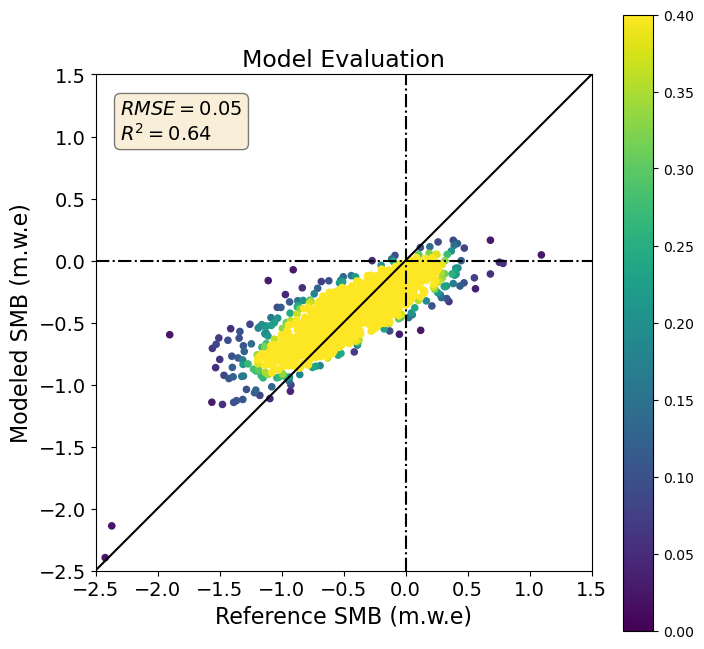

In [33]:
plot_prediction(y_train, clf.predict(X_train), n_toplot=5000)

## 4.3 Testing the final model